In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    'figure.figsize': (7, 5),
    'figure.dpi': 100,
    'text.usetex': True,
    'font.family': 'serif',
    'font.size': 12,
})
# Read in the data
df = pd.read_csv('gil.csv', sep=', ', engine='python')

df_frac0 = df[df['frac'] == 0.1]
print(df_frac0)


    workers   n  task_time  accesses  frac  total_time
1         1  40      50000         1   0.1    2.009076
12        2  40      50000         1   0.1    1.014820
23        3  40      50000         1   0.1    0.723614
34        4  40      50000         1   0.1    0.541018
45        5  40      50000         1   0.1    0.439127
56        6  40      50000         1   0.1    0.388195
67        7  40      50000         1   0.1    0.343391
78        8  40      50000         1   0.1    0.314275


In [80]:
def plot_speedup(df, accesses, frac):

    fig, ax = plt.subplots()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #Compute expected time
    df['expected'] = (df['task_time']*df['n'])/(1e6)

    #Select the data for the given accesses and frac
    df = df[(df['accesses'] == accesses) & (df['frac'] == frac)]
    print(df.head())
    plt.plot(df['workers'], df['expected']/df['total_time'], label='Speedup')

    plt.xlabel('Workers')
    plt.ylabel('Speedup')


    workers   n  task_time  accesses  frac  total_time  expected   speedup
0         1  40      50000         1   0.0    2.006151       2.0  0.996934
11        2  40      50000         1   0.0    1.004356       2.0  1.991327
22        3  40      50000         1   0.0    0.703955       2.0  2.841092
33        4  40      50000         1   0.0    0.505422       2.0  3.957088
44        5  40      50000         1   0.0    0.403279       2.0  4.959350
55        6  40      50000         1   0.0    0.353028       2.0  5.665274
66        7  40      50000         1   0.0    0.302429       2.0  6.613112
77        8  40      50000         1   0.0    0.254549       2.0  7.857040
0     1
1     1
2     1
3     1
4     1
     ..
83    8
84    8
85    8
86    8
87    8
Name: workers, Length: 88, dtype: int64


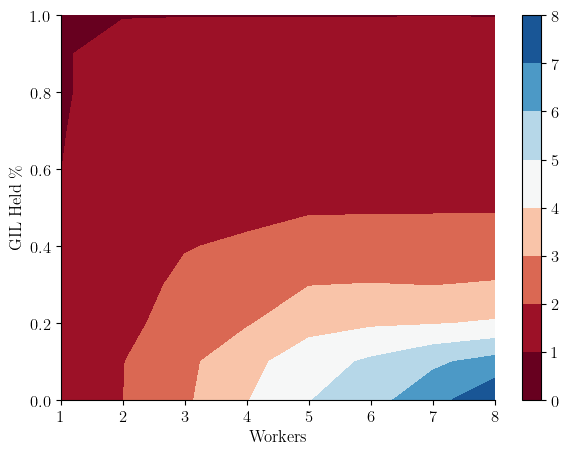

In [131]:
def plot_fraction_workers(df, time, accesses):

    from scipy.interpolate import griddata

    #Plot as 2D surface

    fig, ax = plt.subplots()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #Compute expected time
    df['expected'] = (df['task_time']*df['n'])/(1e6)
    df['speedup'] = df['expected']/df['total_time']

    #Select the data for the given accesses and frac
    df = df[(df['task_time'] == time) & (df['accesses'] == accesses)]

    #print(df[df['frac'] == 0])

    workers = df['workers'].unique()
    fracs = df['frac'].unique()
    workers, fracs = np.meshgrid(workers, fracs)
    workers = workers.T
    fracs = fracs.T
    speedup  = df['speedup'].values.reshape(workers.shape)
    
    #Interpolate the data
    #zi = griddata((df['workers'], df['accesses']), df['expected']/df['total_time'], (np.arange(1, 9), np.arange(1, 11)), method='linear')
    mesh = plt.contourf(workers, fracs, speedup, levels=np.arange(0, 9), cmap='RdBu', vmin=1, vmax=8)
    ax.set_xlim([1, 8])
    ax.set_ylim([0, 1])

    print(df['workers'])
    ax.set_xlabel('Workers')
    ax.set_ylabel('GIL Held \%')
    plt.colorbar(mesh)


plot_fraction_workers(df, 50000, 1)

In [ ]:
plot_speedup(df, 1, 0)

In [130]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

drop_time = widgets.Dropdown(options=df['task_time'].unique(), value=50000, description='Task Length:')
drop_accesses = widgets.Dropdown(options=df['accesses'].unique(), value=1, description='Accesses:')

interact(plot_fraction_workers, df=fixed(df), time=drop_time, accesses=drop_accesses)

interactive(children=(Dropdown(description='Task Length:', options=(50000,), value=50000), Dropdown(descriptio…

<function __main__.plot_fraction_workers(df, time, accesses)>